In [1]:
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np
import numpy as np
%matplotlib inline


In [134]:
def multipleImgShow(plts,titles,figSize=(12,12)):
    f, plots = plt.subplots(1,len(plts),figsize=figSize)
    for i in  range(len(plots)):
        plots[i].imshow(cv.cvtColor(plts[i],cv.COLOR_BGR2RGB))
        plots[i].set_title(titles[i])
        plots[i].axis('off')
    plt.show()


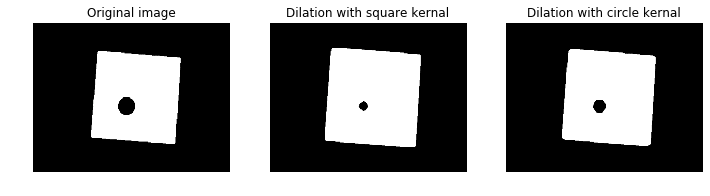

True

In [135]:
squareCircleImg = cv.cvtColor(cv.imread('input/Square-circle.png', 1), cv.COLOR_BGR2RGB)
square_dilation = cv.dilate(squareCircleImg, cv.getStructuringElement(cv.MORPH_RECT, (5,5)), iterations=3)
circle_dilation = cv.dilate(squareCircleImg, cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5)), iterations=2)
#imshow
imgs = [squareCircleImg, square_dilation, circle_dilation]
titles = ['Original image', 'Dilation with square kernal', 'Dilation with circle kernal']
multipleImgShow(imgs, titles)
cv.imwrite("output/square-circle-1.png", square_dilation)
cv.imwrite("output/square-circle-2.png", circle_dilation)

True

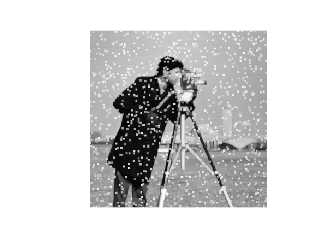

In [136]:
cameraManImg = cv.cvtColor(cv.imread('input/Cameraman.png', 1), cv.COLOR_BGR2RGB)
cameraman_denoised = cv.dilate(cameraManImg, cv.getStructuringElement(cv.MORPH_RECT, (3,3)), iterations=1)
plt.imshow(cameraman_denoised)
plt.axis('off')
cv.imwrite("output/cameraman-denoised.png", cameraman_denoised)

True

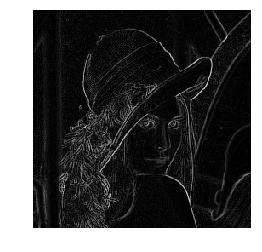

In [143]:
ladyImg = cv.cvtColor(cv.imread('input/lady.png', 1), cv.COLOR_BGR2RGB)
edge_detected = cv.dilate(ladyImg, cv.getStructuringElement(cv.MORPH_RECT, (3,3)), iterations=1)
edgedImg = edge_detected-ladyImg
plt.imshow(edgedImg)
plt.axis('off')
cv.imwrite("output/lady-edge.png", edgedImg)

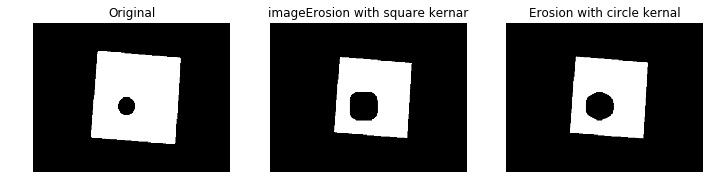

True

In [144]:
squareCircleImg = cv.cvtColor(cv.imread('input/Square-circle.png', 1), cv.COLOR_BGR2RGB)
square_eroded = cv.erode(squareCircleImg, cv.getStructuringElement(cv.MORPH_RECT, (5,5)), iterations=5)
circle_eroded = cv.erode(squareCircleImg, cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5)), iterations=5)

imgs = [squareCircleImg,square_eroded,circle_eroded]
titles = ['Original', 'imageErosion with square kernar','Erosion with circle kernal']
multipleImgShow(imgs,titles)

cv.imwrite("output/circle-square-erode-1.png", square_eroded)
cv.imwrite("output/circle-square-erode-2.png", circle_eroded)

True

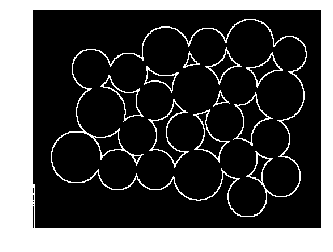

In [139]:
circleImg = cv.cvtColor(cv.imread('input/Circle.png', 1), cv.COLOR_BGR2RGB)
_,thresholded_img = cv.threshold(circleImg,120,255,cv.THRESH_BINARY)
circle_eroded = cv.erode(thresholded_img, cv.getStructuringElement(cv.MORPH_RECT, (5,5)), iterations=1)
plt.axis('off')
plt.imshow(thresholded_img-circle_eroded)
cv.imwrite("output/circle-erode.png", circle_eroded)

True

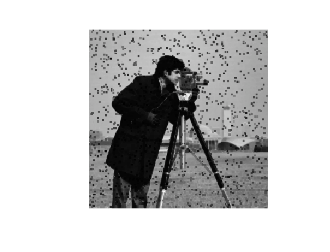

In [140]:
cameraManImg = cv.cvtColor(cv.imread('input/Cameraman.png', 1), cv.COLOR_BGR2RGB)
cameraman_eroded = cv.erode(cameraManImg, cv.getStructuringElement(cv.MORPH_RECT, (3,3)), iterations=1)
plt.axis('off')
plt.imshow(cameraman_eroded)
cv.imwrite("output/cameraman-erode.png", cameraman_eroded)

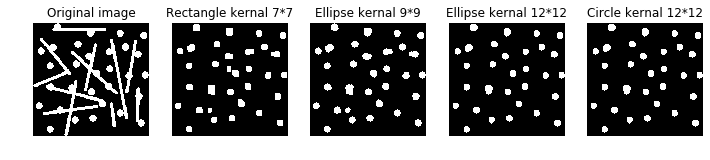

In [141]:
circleLinesImg = cv.cvtColor(cv.imread('input/Circle_and_Lines.png', 1), cv.COLOR_BGR2RGB)

circle_lines_open_rect = cv.morphologyEx(circleLinesImg, cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_RECT, (7,7)))
circle_lines_open_elipse_1 = cv.morphologyEx(circleLinesImg, cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_ELLIPSE, (9,9)))
circle_lines_open_elipse_2 = cv.morphologyEx(circleLinesImg, cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_ELLIPSE, (12,12)))
circle_lines_open_circle = cv.morphologyEx(circleLinesImg,cv.MORPH_OPEN,cv.getStructuringElement(cv.MORPH_ELLIPSE,(12,12)))

imgs = [circleLinesImg,circle_lines_open_rect,circle_lines_open_elipse_1,circle_lines_open_elipse_2,circle_lines_open_circle]
titles = ['Original image', 'Rectangle kernal 7*7','Ellipse kernal 9*9','Ellipse kernal 12*12','Circle kernal 12*12']
multipleImgShow(imgs,titles)


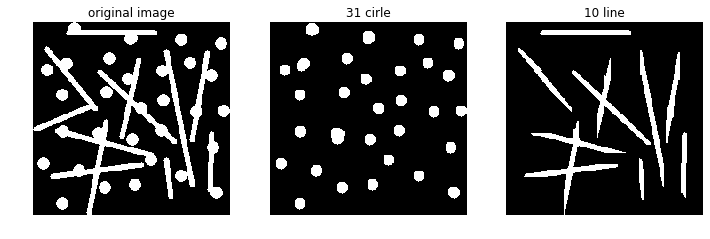

True

In [180]:
circleLinesImg = cv.imread('input/Circle_and_Lines.png', 0)
squareSE_V = cv.getStructuringElement(cv.MORPH_RECT,(1,24))
squareSE_H = cv.getStructuringElement(cv.MORPH_RECT,(24,1))
squareSE_45 = np.eye(24,dtype = np.uint8)
circleSE = cv.getStructuringElement(cv.MORPH_ELLIPSE,(12,12))
circles = cv.morphologyEx(circleLinesImg,cv.MORPH_OPEN,circleSE)
#morphological operatoins
linesOpen45 = cv.morphologyEx(circleLinesImg,cv.MORPH_OPEN,squareSE_45)
linesOpenV = cv.morphologyEx(circleLinesImg,cv.MORPH_OPEN,squareSE_V)
linesOpenH = cv.morphologyEx(circleLinesImg,cv.MORPH_OPEN,squareSE_H)
linesTotal = linesOpen45 + linesOpenV + linesOpenH 

ss,thresholded_img_1 = cv.threshold(circles,127,255,cv.THRESH_BINARY)
s1,p1= cv.connectedComponents(thresholded_img_1)
ss,thresholded_img_2 = cv.threshold(linesTotal,127,255,cv.THRESH_BINARY)
s2,p2= cv.connectedComponents(thresholded_img_2)

imgs = [circleLinesImg,circles,linesFinal]
titles = ['original image', str(s1)+' cirle', str(s2)+' line']
multipleImgShow(imgs, titles)
cv.imwrite("output/circle.png", circles)
cv.imwrite("output/line.png", linesFinal)

True

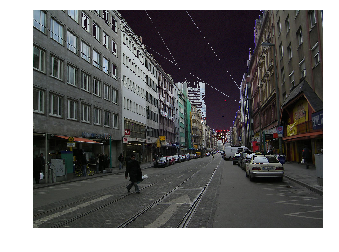

In [254]:
eveningImg = cv.cvtColor(cv.imread('input/evening.jpg', 1), cv.COLOR_BGR2RGB)
morningImg = cv.cvtColor(cv.imread('input/morning.jpg', 1), cv.COLOR_BGR2RGB)
origMorning = morningImg.copy()
_,thresholded_img = cv.threshold(morningImg,200,255,cv.THRESH_BINARY)
eroded_morning=cv.erode(thresholded_img, cv.getStructuringElement(cv.MORPH_RECT, (3,3)), iterations=6)
dilated_morning=cv.dilate(eroded_morning, cv.getStructuringElement(cv.MORPH_RECT, (3,3)), iterations=6)


background =[]
for i in range(morningImg.shape[0]):
    for j in range(morningImg.shape[1]):
        if thresholded_img[i,j,0] == 255:
            background.append((i,j))

for i in background:
    if i[1]>800:
        continue
    morningImg[i[0],i[1]]=eveningImg[i[0],i[1]]

imgs = [eveningImg, origMorning, morningImg, ]
plt.axis('off')
plt.imshow(morningImg)
cv.imwrite('output/morningsky.jpg', morningImg)

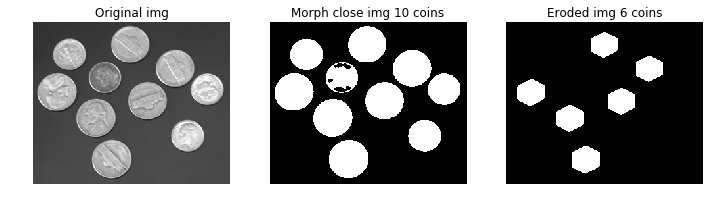

$50 * 6 + $25 * 4 = 400 $


In [251]:
coinsImg = cv.imread('input/coins.png', 0)
_,thresholded_img = cv.threshold(coinsImg,120,255,cv.THRESH_BINARY)
morph_close = cv.morphologyEx(thresholded_img,cv.MORPH_CLOSE,cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5)))
eroded_img = cv.erode(morph_close, cv.getStructuringElement(cv.MORPH_ELLIPSE, (6,6)), iterations=9)
dilated_img = cv.dilate(eroded_img, cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5)), iterations=9)

s1,p1= cv.connectedComponents(morph_close)
s2,p2= cv.connectedComponents(dilated_img)

imgs = [coinsImg, morph_close, dilated_img ]
titles = ['Original img','Morph close img '+str(s1-1)+' coins', 'Eroded img '+ str(s2-1)+' coins']
multipleImgShow(imgs,titles)

print('$50 *',s2-1, '+ $25 *', s1-s2, '=', (s2-1)*50+(s1-s2)*25, '$' )